In [ ]:
# Import Libraries
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
# Load  data from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data.data,data.target,test_size=0.3)

In [ ]:
#Getting No. rows and columns
N,D = xtrain.shape

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(xtrain)
x_test = scaler.transform(xtest)

In [ ]:
# Build a model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(D,),activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(x_train,ytrain,validation_data=(x_test,ytest),epochs=100)

In [ ]:
# Evaluate
print(model.evaluate(x_train,ytrain))
print(model.evaluate(x_test,ytest))

13/13 [==============================] - 0s 2ms/step - loss: 0.1004 - accuracy: 0.9673
[0.10044606029987335, 0.9673366546630859]
6/6 [==============================] - 0s 2ms/step - loss: 0.0814 - accuracy: 0.9883
[0.08140084147453308, 0.988304078578949]


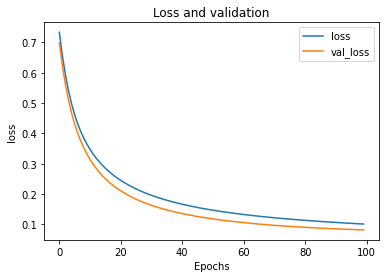

In [ ]:
# Plot for loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.title('Loss and validation',loc='center')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

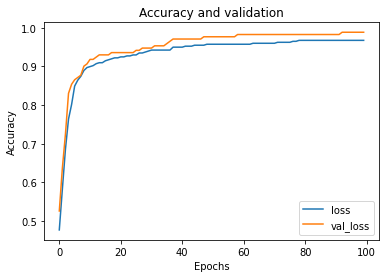

In [ ]:
# Plot for accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='loss')
plt.plot(r.history['val_accuracy'],label='val_loss')
plt.title('Accuracy and validation',loc='center')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
#Predictions
import numpy as np
y_pred = np.round(y_pred).flatten()
print(y_pred)

[0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1.]


In [ ]:
# Calculate Accuracy Manually
np.mean(y_pred == ytest)

0.9883040935672515

In [ ]:
#Model Evaluate
model.evaluate(x_test,ytest)

6/6 [==============================] - 0s 2ms/step - loss: 0.0814 - accuracy: 0.9883


[0.08140084147453308, 0.988304078578949]